In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

#reading an image

In [5]:
image=mpimg.imread('lane.jpg')

#printing out some stats and plotting the image

This image is  : <class 'numpy.ndarray'> with dimension: (168, 299, 3)


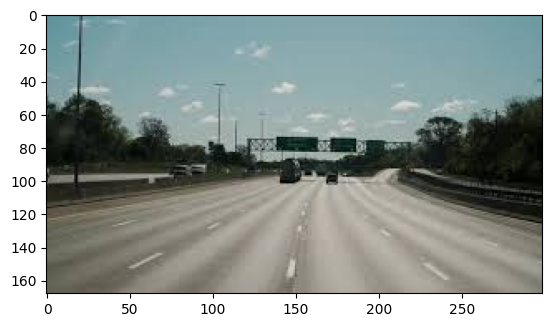

In [6]:
print('This image is  :',type(image),'with dimension:',image.shape)
plt.imshow(image)
plt.show()

#bottom left:(0,height)
#Horizon:(width/2,height/2)
#bottom right:(width,height)

In [7]:
import numpy as np
import cv2

In [8]:
def region_of_interest(img,vertices):
    # Define a blank matrix that matches the image height/width.
    mask=np.zeros_like(img)
    #retrive no of color channels
    channel_count=img.shape[2]
    #create a match color with smae color channel
    match_mask_color=(255,)*channel_count
    #fill inside polyogn
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

In [9]:
height=image.shape[0]
width=image.shape[1]

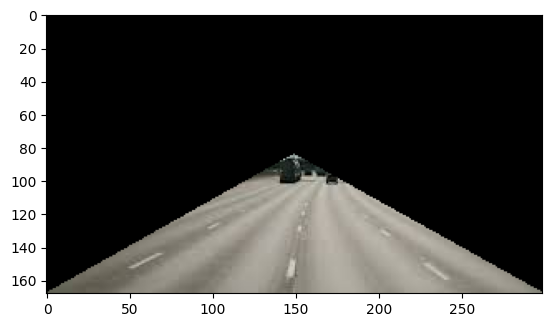

In [10]:

region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
cropped_image=region_of_interest(image,np.array([region_of_interest_vertices],np.int32),)
plt.figure()
plt.imshow(cropped_image)
plt.show()

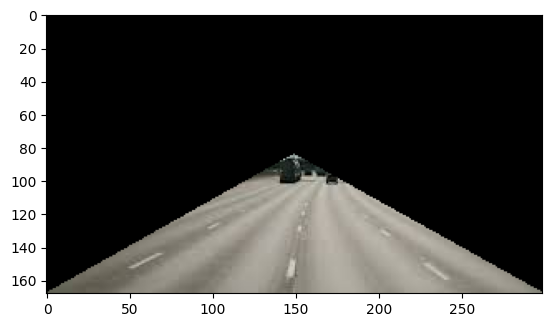

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('lane.jpg')
cropped_image = region_of_interest(
    image,
    np.array([region_of_interest_vertices], np.int32),
)
plt.figure()
plt.imshow(cropped_image)
plt.show()


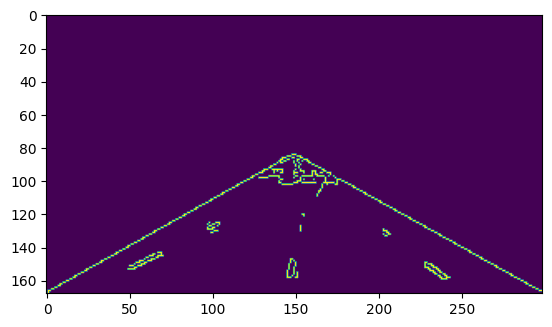

In [12]:
gray_image=cv2.cvtColor(cropped_image,cv2.COLOR_RGB2GRAY)
cannyed_image=cv2.Canny(gray_image,100,200)
plt.figure()
plt.imshow(cannyed_image)
plt.show()

In [13]:
def region_of_interest2(img,vertices):
    mask=np.zeros_like(img)
    match_mask_color=255

    cv2.fillPoly(mask,vertices,match_mask_color)
    masked_image=cv2.bitwise_and(img,mask)
    return masked_image

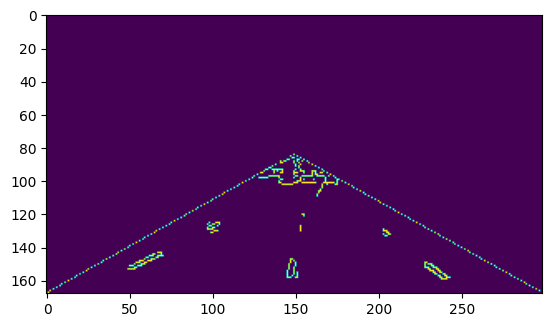

In [14]:
cropped_image = region_of_interest2(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()


In [15]:
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)



None


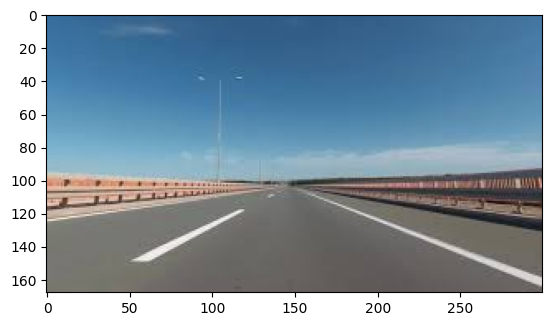

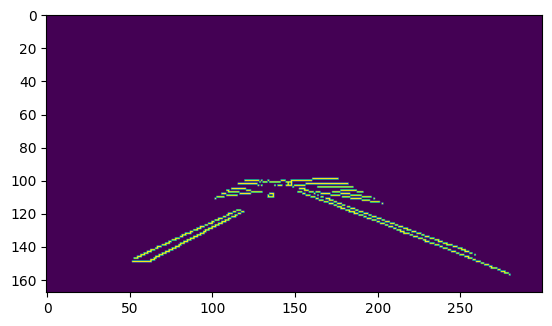

In [16]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    match_mask_color = 255 # <-- This line altered for grayscale.

    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image
region_of_interest_vertices = [
    (0, height),
    (width / 2, height / 2),
    (width, height),
]
image = mpimg.imread('lane3.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
# Moved the cropping operation to the end of the pipeline.
cropped_image = region_of_interest(
    cannyed_image,
    np.array([region_of_interest_vertices], np.int32)
)
plt.figure()
plt.imshow(cropped_image)
plt.show()


In [17]:
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
print(lines)


[[[148 101 232 138]]

 [[144 100 216 132]]

 [[ 53 147 106 123]]]


In [23]:
import numpy as np
import cv2

def draw_lines(img, lines, color=[255, 0, 0], thickness=3):
    # If there are no lines to draw, exit.
    if lines is None:
        return
    # Make a copy of the original image.
    img_copy = np.copy(img)
    # Create a blank image that matches the original in size.
    line_img = np.zeros(
        (
            img.shape[0],
            img.shape[1],
            3
        ),
        dtype=np.uint8,
    )
    # Loop over all lines and draw them on the blank image.
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_img, (x1, y1), (x2, y2), color, thickness)
    # Merge the image with the lines onto the original.
    img_result = cv2.addWeighted(img_copy, 0.8, line_img, 1.0, 0.0)
    # Return the modified image.
    return img_result


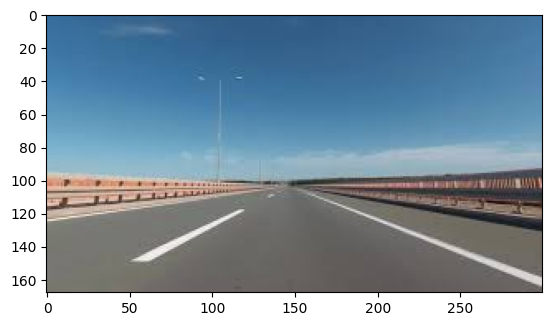

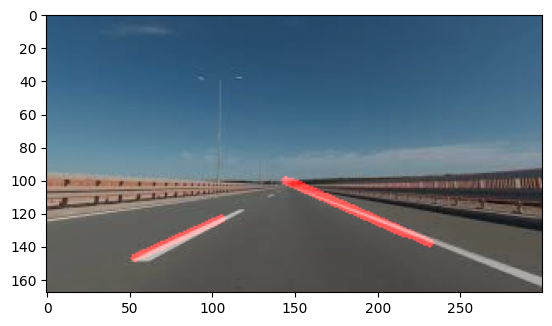

In [24]:
image = mpimg.imread('lane3.jpg')
plt.figure()
plt.imshow(image)
plt.show()
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
cannyed_image = cv2.Canny(gray_image, 100, 200)
cropped_image = region_of_interest(
    cannyed_image,
    np.array(
        [region_of_interest_vertices],
        np.int32
    ),
)
lines = cv2.HoughLinesP(
    cropped_image,
    rho=6,
    theta=np.pi / 60,
    threshold=160,
    lines=np.array([]),
    minLineLength=40,
    maxLineGap=25
)
line_image = draw_lines(image, lines) # <---- Add this call.
plt.figure()
plt.imshow(line_image)
plt.show()
